In [101]:
import missingno as msno
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)


In [62]:
input_df = pd.read_csv("german_credit_data_unclean.csv")

In [63]:
original_columns = ['check_account_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_account', 'employment_duration',
       'percent_disposable_income', 'gender_marriage', 'other_debtors',
       'recident_since', 'property', 'age', 'other_plans', 'housing',
       'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker',
       'default']

rename_columns = ["cs", "dr", "ch", "pu", "ca", "sa", "ed", "pdi", "gm", "od", "rs", "p", "a", "op", "h", "nc", "j", "d", "t", "fw", "default"]

In [64]:
input_df = input_df.rename(columns=dict(zip(original_columns, rename_columns)))

In [65]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cs       1000 non-null   object 
 1   dr       1000 non-null   int64  
 2   ch       1000 non-null   object 
 3   pu       1000 non-null   object 
 4   ca       987 non-null    float64
 5   sa       1000 non-null   object 
 6   ed       1000 non-null   object 
 7   pdi      1000 non-null   int64  
 8   gm       1000 non-null   object 
 9   od       1000 non-null   object 
 10  rs       1000 non-null   int64  
 11  p        1000 non-null   object 
 12  a        988 non-null    float64
 13  op       1000 non-null   object 
 14  h        1000 non-null   object 
 15  nc       1000 non-null   int64  
 16  j        1000 non-null   object 
 17  d        1000 non-null   int64  
 18  t        1000 non-null   object 
 19  fw       1000 non-null   object 
 20  default  1000 non-null   int64  
dtypes: float64(2), 

In [66]:
input_df.describe()

,dr,ca,pdi,rs,a,nc,d,default
count,1000.00,987.00,1000.00,1000.00,988.00,1000.00,1000.00,1000.00
mean,20.90,3279.16,2.97,2.85,35.55,1.41,1.16,0.30
std,12.06,2837.48,1.12,1.10,11.41,0.58,0.36,0.46
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00,0.00
25%,12.00,1362.50,2.00,2.00,27.00,1.00,1.00,0.00
50%,18.00,2319.00,3.00,3.00,33.00,1.00,1.00,0.00
75%,24.00,3974.50,4.00,4.00,42.00,2.00,1.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00,1.00


<Axes: >

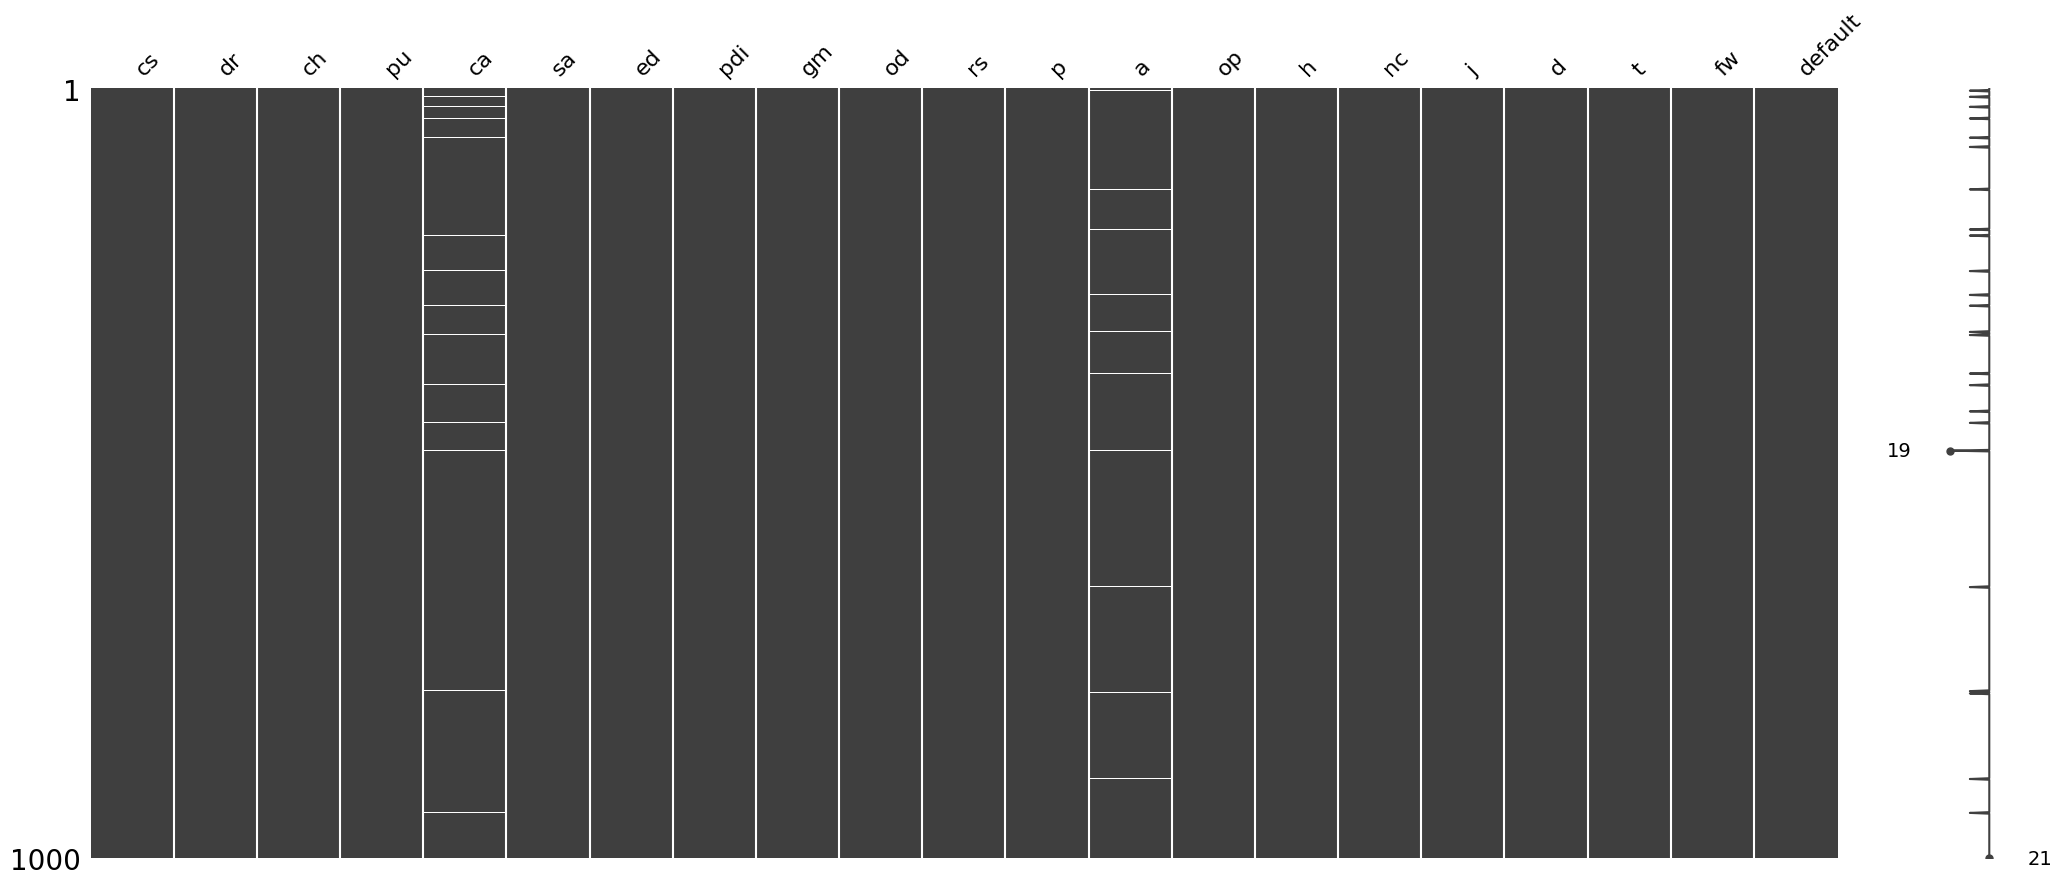

In [67]:
msno.matrix(input_df)

<Axes: >

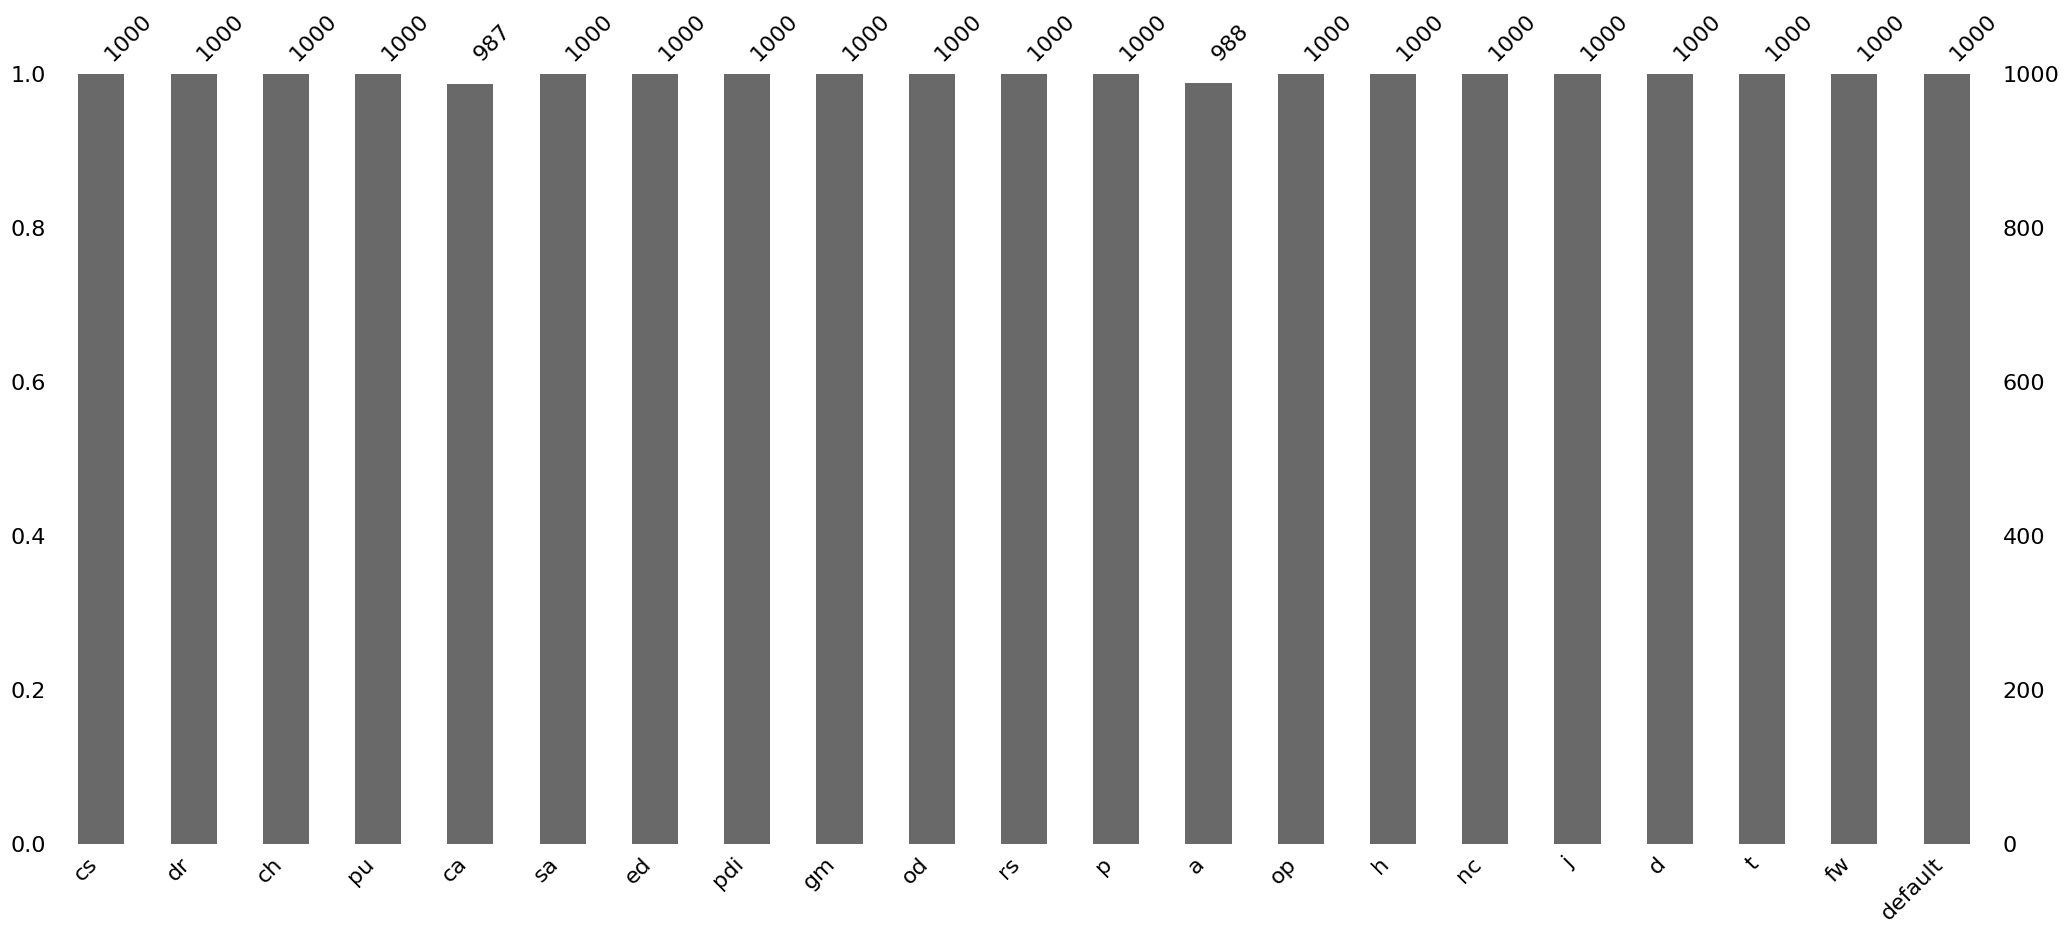

In [68]:
msno.bar(input_df)

In [69]:
input_df = input_df.dropna(subset="ca")

In [70]:
input_df["a"] = input_df["a"].fillna(input_df["a"].mean())

<Axes: >

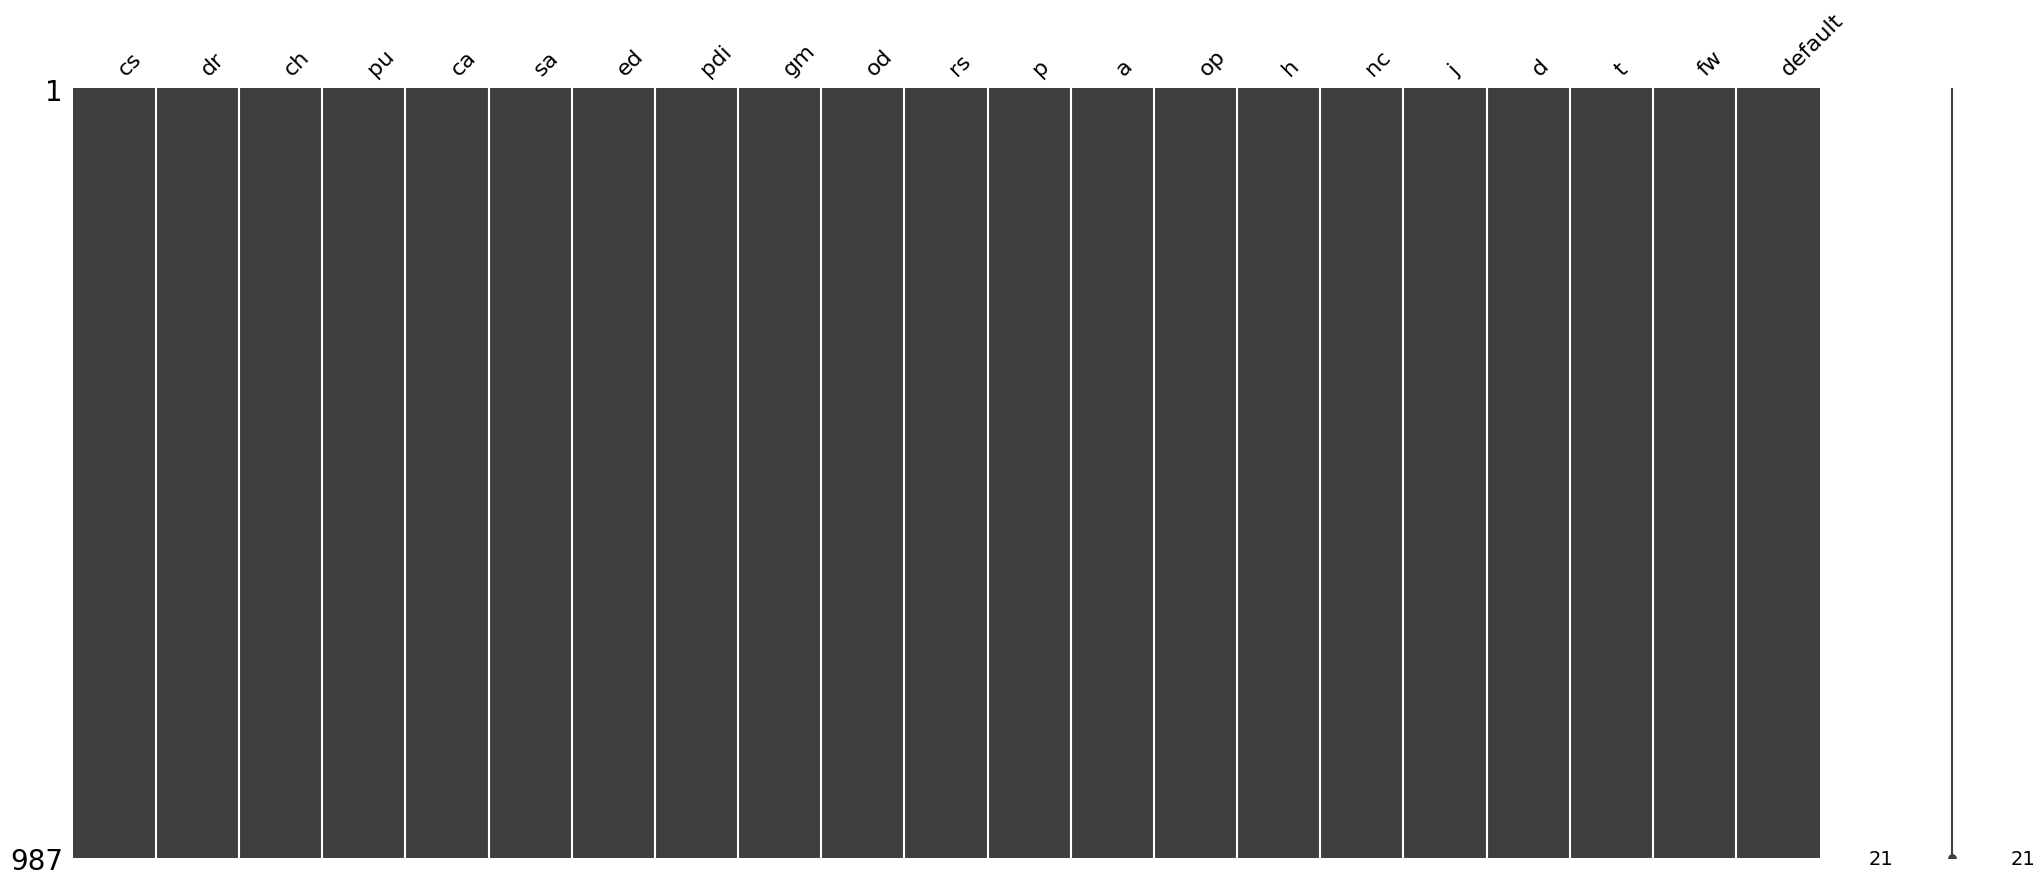

In [71]:
msno.matrix(input_df)

In [72]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 0 to 999
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cs       987 non-null    object 
 1   dr       987 non-null    int64  
 2   ch       987 non-null    object 
 3   pu       987 non-null    object 
 4   ca       987 non-null    float64
 5   sa       987 non-null    object 
 6   ed       987 non-null    object 
 7   pdi      987 non-null    int64  
 8   gm       987 non-null    object 
 9   od       987 non-null    object 
 10  rs       987 non-null    int64  
 11  p        987 non-null    object 
 12  a        987 non-null    float64
 13  op       987 non-null    object 
 14  h        987 non-null    object 
 15  nc       987 non-null    int64  
 16  j        987 non-null    object 
 17  d        987 non-null    int64  
 18  t        987 non-null    object 
 19  fw       987 non-null    object 
 20  default  987 non-null    int64  
dtypes: float64(2), int64(

In [73]:
input_df.isnull().any()

cs         False
dr         False
ch         False
pu         False
ca         False
sa         False
ed         False
pdi        False
gm         False
od         False
rs         False
p          False
a          False
op         False
h          False
nc         False
j          False
d          False
t          False
fw         False
default    False
dtype: bool

In [77]:
categorical_features = ['cs', 'ch', 'pu', 'sa', 'ed', 'gm', 'od', 'p', 'op', 'h', 'j', 't', 'fw']
input_df

,cs,dr,ch,pu,ca,sa,ed,pdi,gm,od,rs,p,a,op,h,nc,j,d,t,fw,default
0,A11,6,A34,A43,1169.0,A65,A75,4,A93,A101,4,A121,67.00,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951.0,A61,A73,2,A92,A101,2,A121,22.00,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096.0,A61,A74,2,A93,A101,3,A121,49.00,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882.0,A61,A74,2,A93,A103,4,A122,35.58,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870.0,A61,A73,3,A93,A101,4,A124,53.00,A143,A153,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736.0,A61,A74,3,A92,A101,4,A121,31.00,A143,A152,1,A172,1,A191,A201,0
996,A11,30,A32,A41,3857.0,A61,A73,4,A91,A101,4,A122,40.00,A143,A152,1,A174,1,A192,A201,0
997,A14,12,A32,A43,804.0,A61,A75,4,A93,A101,4,A123,38.00,A143,A152,1,A173,1,A191,A201,0
998,A11,45,A32,A43,1845.0,A61,A73,4,A93,A101,4,A124,23.00,A143,A153,1,A173,1,A192,A201,1


In [79]:
input_df = pd.get_dummies(input_df, columns=categorical_features)

In [82]:
Y = input_df["default"]
X = input_df.drop(columns=["default"])

In [84]:
Y.shape

(987,)

In [85]:
X.shape

(987, 61)

In [88]:
log_model = LogisticRegression(solver='liblinear')
log_model.fit(X, Y)

LogisticRegression(solver='liblinear')

In [90]:
log_model.score(X, Y)

0.7852077001013171

In [91]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(input_df, test_size=0.2)

In [92]:
log_model.fit(train.drop(columns=["default"]), train["default"])
log_model.predict(test.drop(columns=["default"]))

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [93]:
log_model.score(test.drop(columns=["default"]), test["default"])

0.7272727272727273

In [96]:
confusion_matrix(test["default"], log_model.predict(test.drop(columns=["default"])))

array([[125,  21],
       [ 33,  19]])

<Axes: >

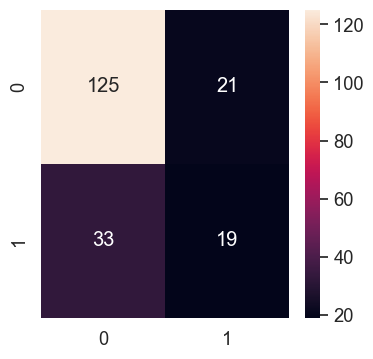

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(test["default"], log_model.predict(test.drop(columns=["default"]))), annot=True, fmt='g')

In [103]:
print(classification_report(test["default"], log_model.predict(test.drop(columns=["default"]))))
# could be imbalanced

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       146
           1       0.47      0.37      0.41        52

    accuracy                           0.73       198
   macro avg       0.63      0.61      0.62       198
weighted avg       0.71      0.73      0.71       198



In [105]:
log_model.intercept_

array([-0.49299112])

In [104]:
log_model.coef_

array([[ 2.11777840e-02,  1.38301258e-04,  2.91840840e-01,
        -8.44804151e-02, -1.64925801e-02,  1.37616248e-01,
         1.65541579e-01,  6.48355828e-01,  3.75062528e-01,
        -6.58866131e-01, -8.57543346e-01,  3.66600314e-01,
         4.94864086e-01, -2.47964819e-01, -1.34641767e-01,
        -9.71848935e-01,  6.23155292e-01, -1.05416250e+00,
        -2.80210590e-01, -1.54349786e-02, -3.02178459e-01,
        -8.34074019e-02,  2.62698750e-01,  6.77969198e-01,
        -1.70156912e-01, -1.51263515e-01,  3.98518345e-01,
         5.23021684e-02,  1.72226328e-02, -4.15402031e-01,
        -5.45632236e-01,  1.83739752e-02,  1.30469848e-01,
        -6.52351369e-02, -5.92174772e-01,  1.55749653e-02,
         2.91553235e-01,  2.48475122e-02, -5.08733943e-01,
        -3.00657926e-01, -1.20229406e-01,  1.92244427e-01,
        -5.65006143e-01, -3.81169535e-01, -7.72242147e-02,
        -2.13430683e-01,  1.78833311e-01,  4.86833157e-02,
        -2.17360098e-02, -5.19938427e-01,  6.13967518e-0

In [112]:
feature_dict = {v: k for k, v in enumerate(train.drop(columns=["default"]).columns)}
feature_dict

{'dr': 0,
 'ca': 1,
 'pdi': 2,
 'rs': 3,
 'a': 4,
 'nc': 5,
 'd': 6,
 'cs_A11': 7,
 'cs_A12': 8,
 'cs_A13': 9,
 'cs_A14': 10,
 'ch_A30': 11,
 'ch_A31': 12,
 'ch_A32': 13,
 'ch_A33': 14,
 'ch_A34': 15,
 'pu_A40': 16,
 'pu_A41': 17,
 'pu_A410': 18,
 'pu_A42': 19,
 'pu_A43': 20,
 'pu_A44': 21,
 'pu_A45': 22,
 'pu_A46': 23,
 'pu_A48': 24,
 'pu_A49': 25,
 'sa_A61': 26,
 'sa_A62': 27,
 'sa_A63': 28,
 'sa_A64': 29,
 'sa_A65': 30,
 'ed_A71': 31,
 'ed_A72': 32,
 'ed_A73': 33,
 'ed_A74': 34,
 'ed_A75': 35,
 'gm_A91': 36,
 'gm_A92': 37,
 'gm_A93': 38,
 'gm_A94': 39,
 'od_A101': 40,
 'od_A102': 41,
 'od_A103': 42,
 'p_A121': 43,
 'p_A122': 44,
 'p_A123': 45,
 'p_A124': 46,
 'op_A141': 47,
 'op_A142': 48,
 'op_A143': 49,
 'h_A151': 50,
 'h_A152': 51,
 'h_A153': 52,
 'j_A171': 53,
 'j_A172': 54,
 'j_A173': 55,
 'j_A174': 56,
 't_A191': 57,
 't_A192': 58,
 'fw_A201': 59,
 'fw_A202': 60}

In [113]:
len(feature_dict)

61

In [ ]:
# chapter 4 - invalid date